# 💠CLUSTERING ANALYSIS 💠

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## 💠Exploratory data analysis (EDA)

In [2]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
print('Shape of data ',data.shape)
data.head()

Shape of data  (3999, 12)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [4]:
data.duplicated().sum()

0

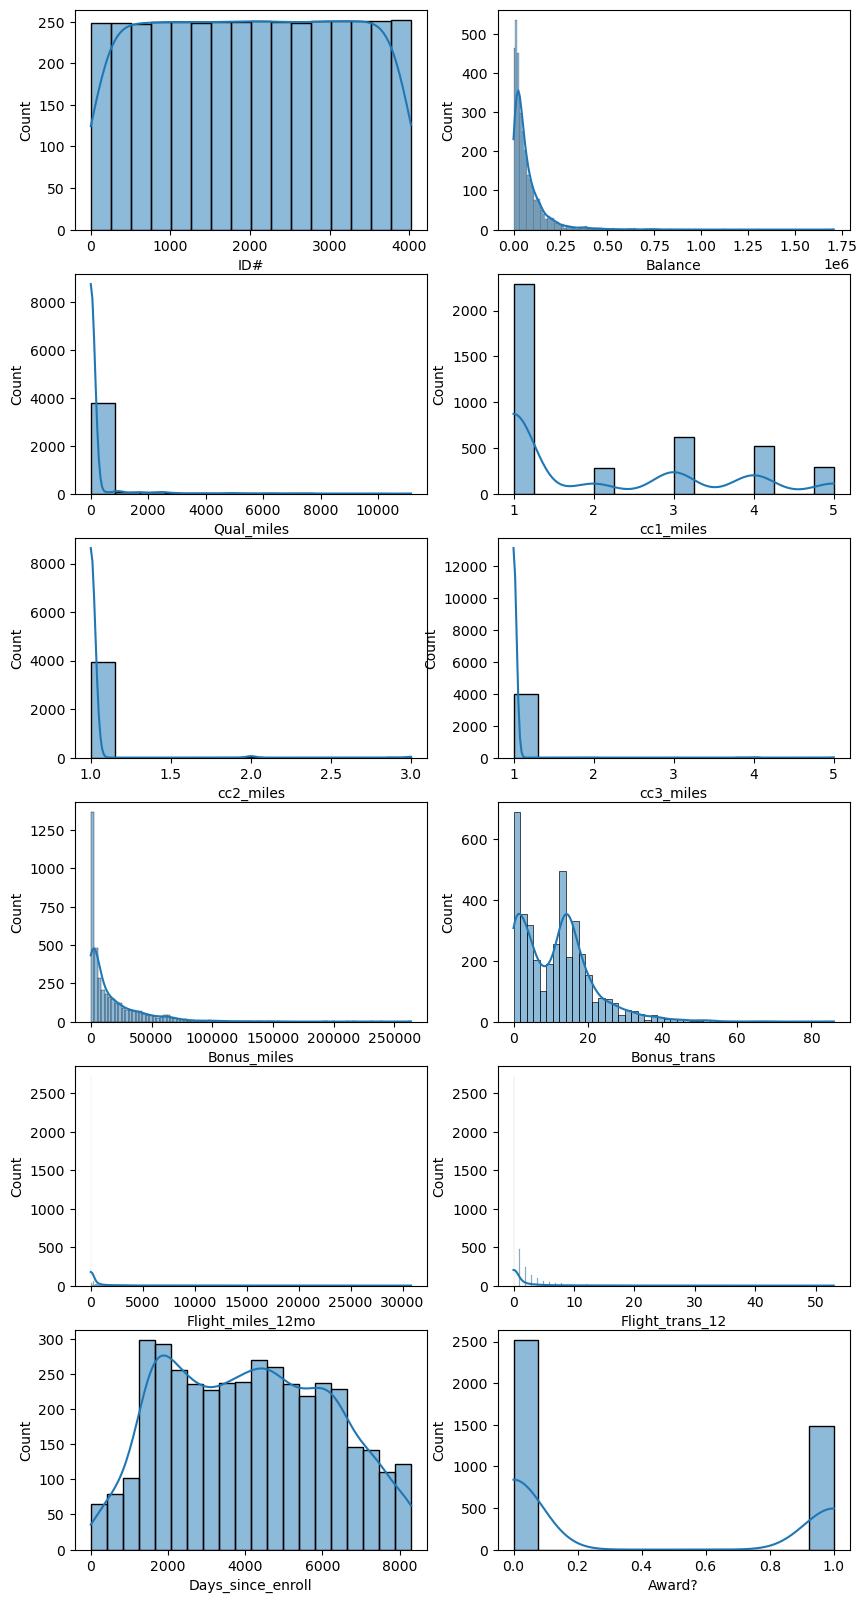

In [5]:
plt.figure(figsize=(10,20))
for x,y in enumerate(data.columns):
    plt.subplot(6,2,x+1)
    sns.histplot(data[y],kde=True)
plt.show()

Shape of data before outlier treatment  (3999, 12)


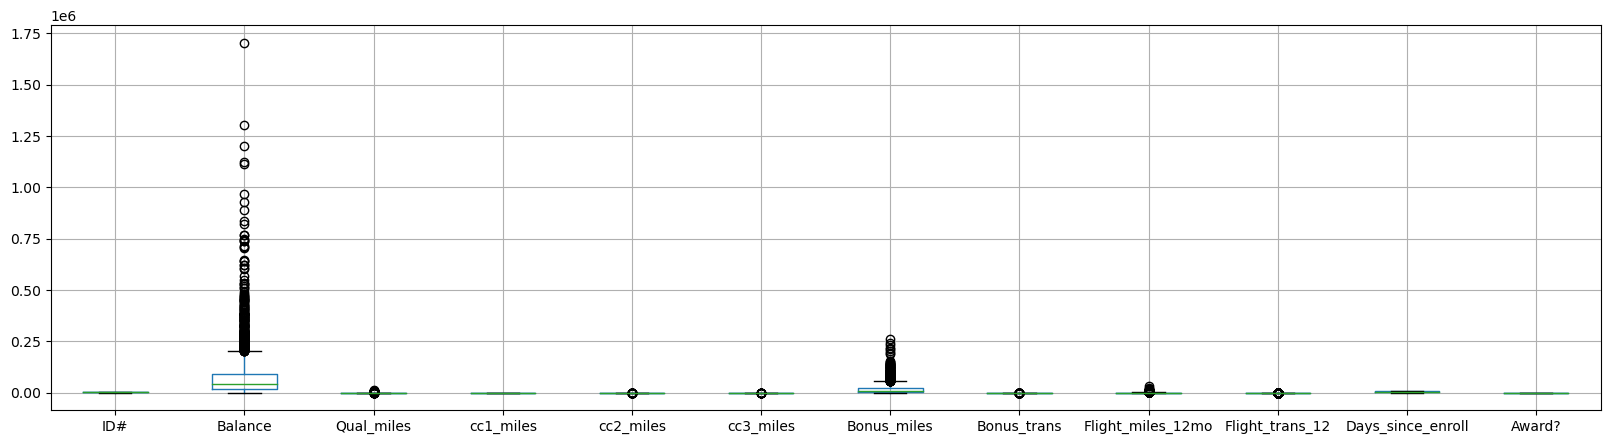

Shape of data after outlier treatment  (3345, 12)


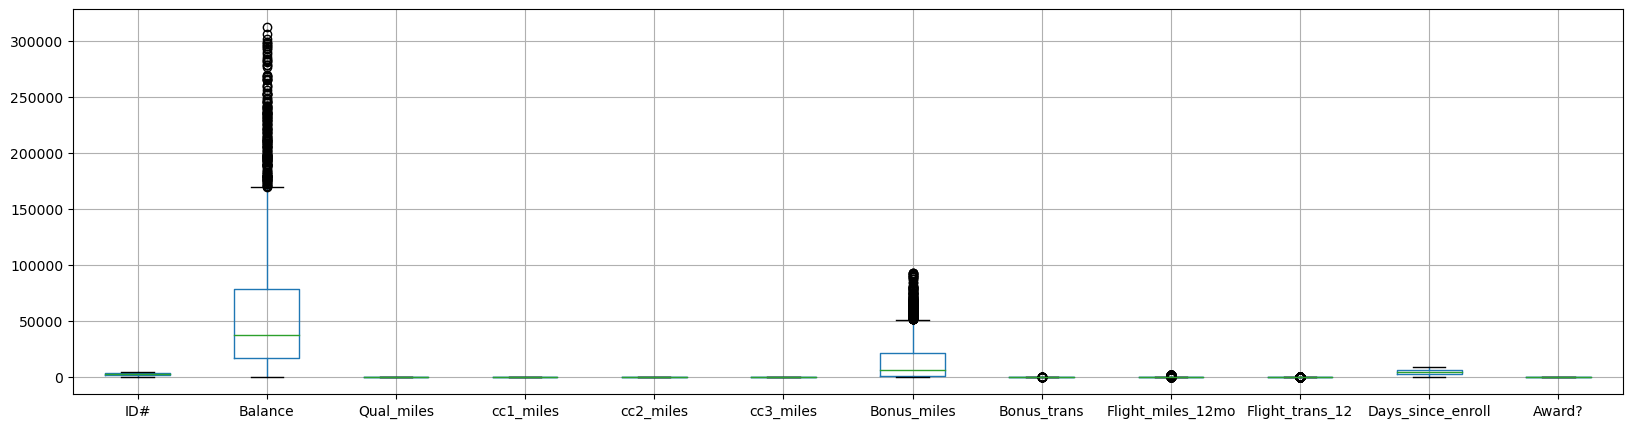

In [6]:
print('Shape of data before outlier treatment ',data.shape)
plt.figure(figsize=(20,5))
data.boxplot()
plt.show()

Q1=data.quantile(0.15)
Q3=data.quantile(0.85)
IQR=Q3-Q1

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Shape of data after outlier treatment ',data.shape)

plt.figure(figsize=(20,5))
data.boxplot()
plt.show()

## 💠Implementing Clustering Algorithms
### 💠KMeans
### 💠Hierarchical Clustering: AgglomerativeClustering
### 💠DBSCAN


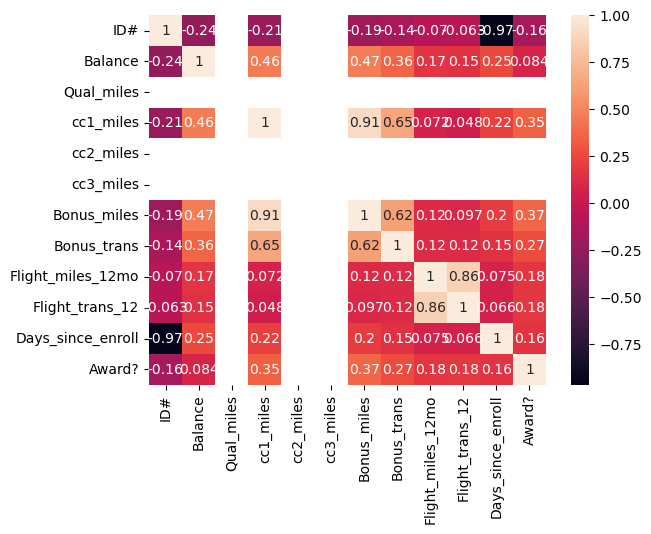

In [7]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [8]:
df=data[['Balance','Bonus_miles','Bonus_trans','Days_since_enroll','Flight_miles_12mo']]  #Selecting features for algorithm

MMScaler=MinMaxScaler()
scaled_df=MMScaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,Balance,Bonus_miles,Bonus_trans,Days_since_enroll,Flight_miles_12mo
0,0.089909,0.001876,0.021277,0.843629,0.0
1,0.061428,0.002318,0.042553,0.839768,0.0
2,0.132189,0.044452,0.085106,0.847732,0.0
3,0.047129,0.005391,0.021277,0.837838,0.0
4,0.052390,0.000000,0.000000,0.836631,0.0


## 💠KMeans

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\clust

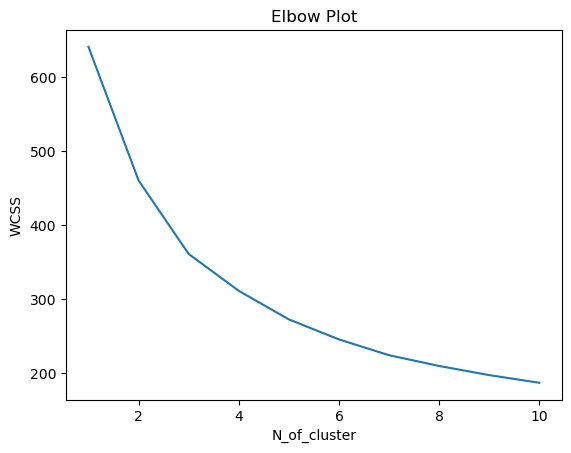

In [9]:
N_of_cluster=list(range(1,11))
wcss=[]

for n in N_of_cluster:
    model_kmeans=KMeans(n_clusters=n,max_iter=100,random_state=100)
    model_kmeans.fit(scaled_df)  
    wcss.append( model_kmeans.inertia_)
    
plt.plot(N_of_cluster,wcss)
plt.xlabel('N_of_cluster')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [10]:
model_kmeans=KMeans(n_clusters=5,max_iter=200,random_state=100)
model_kmeans.fit(scaled_df) 

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=200, n_clusters=5, random_state=100)

In [11]:
data['Cluster_ID_Kmeans']=model_kmeans.labels_
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID_Kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3


<Axes: xlabel='Cluster_ID_Kmeans'>

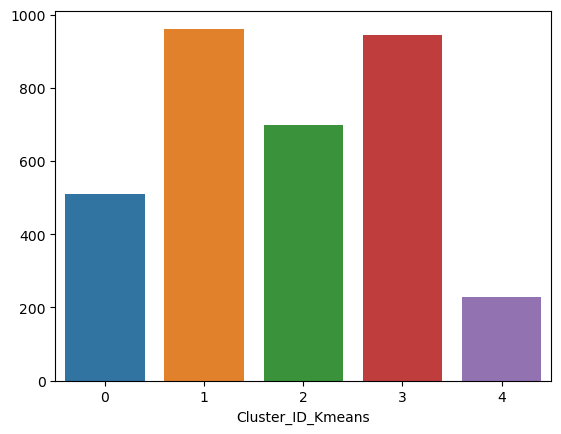

In [12]:
d=data.groupby('Cluster_ID_Kmeans')['Cluster_ID_Kmeans'].count()
sns.barplot(x=d.index,y=d.values)

In [13]:
C0=data[data['Cluster_ID_Kmeans']==0]
C1=data[data['Cluster_ID_Kmeans']==1]
C2=data[data['Cluster_ID_Kmeans']==2]
C3=data[data['Cluster_ID_Kmeans']==3]
C4=data[data['Cluster_ID_Kmeans']==4]

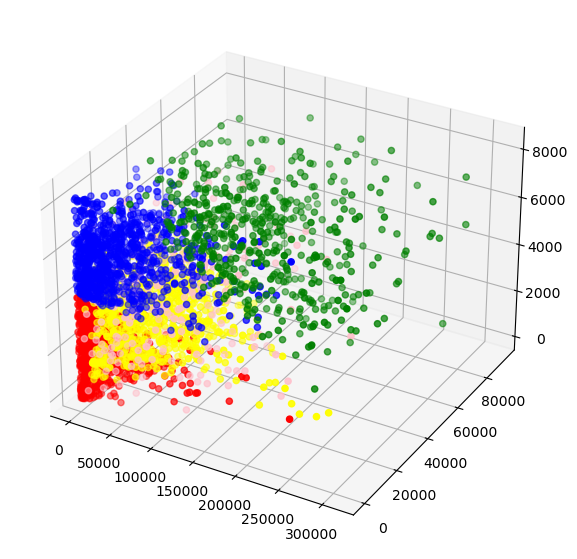

In [14]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


ax.scatter3D(C0['Balance'],C0['Bonus_miles'],C0['Days_since_enroll'],color = "green")
ax.scatter3D(C1['Balance'],C1['Bonus_miles'],C1['Days_since_enroll'],color = "red")
ax.scatter3D(C2['Balance'],C2['Bonus_miles'],C2['Days_since_enroll'],color = "yellow")
ax.scatter3D(C3['Balance'],C3['Bonus_miles'],C3['Days_since_enroll'],color = "blue")
ax.scatter3D(C4['Balance'],C4['Bonus_miles'],C4['Days_since_enroll'],color = "pink")


plt.show()

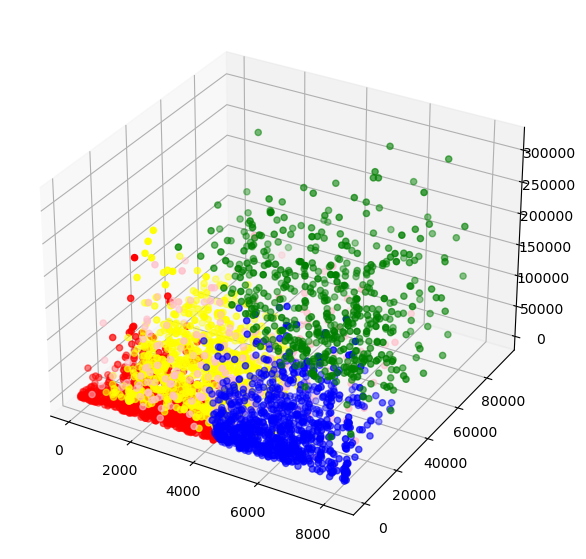

In [15]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(C0['Days_since_enroll'],C0['Bonus_miles'],C0['Balance'],color = "green")
ax.scatter3D(C1['Days_since_enroll'],C1['Bonus_miles'],C1['Balance'],color = "red")
ax.scatter3D(C2['Days_since_enroll'],C2['Bonus_miles'],C2['Balance'],color = "yellow")
ax.scatter3D(C3['Days_since_enroll'],C3['Bonus_miles'],C3['Balance'],color = "blue")
ax.scatter3D(C4['Days_since_enroll'],C4['Bonus_miles'],C4['Balance'],color = "pink")

plt.show()

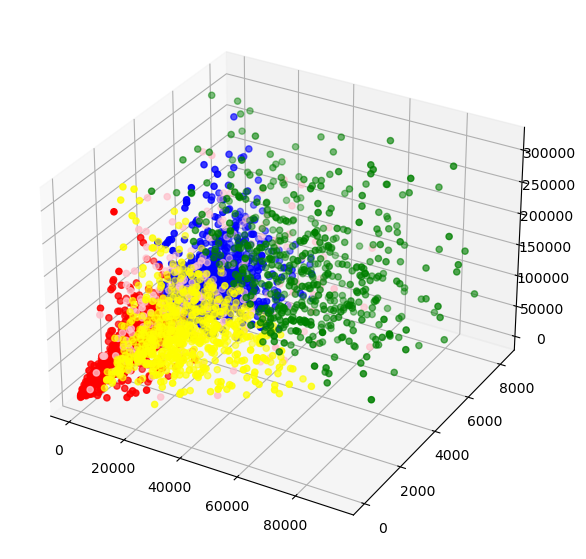

In [16]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(C0['Bonus_miles'],C0['Days_since_enroll'],C0['Balance'],color = "green")
ax.scatter3D(C1['Bonus_miles'],C1['Days_since_enroll'],C1['Balance'],color = "red")
ax.scatter3D(C2['Bonus_miles'],C2['Days_since_enroll'],C2['Balance'],color = "yellow")
ax.scatter3D(C3['Bonus_miles'],C3['Days_since_enroll'],C3['Balance'],color = "blue")
ax.scatter3D(C4['Bonus_miles'],C4['Days_since_enroll'],C4['Balance'],color = "pink")

plt.show()

## 💠AgglomerativeClustering

In [17]:
model= AgglomerativeClustering (n_clusters=3,affinity='euclidean')

model.fit_predict(df)

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

In [18]:
data['Cluster_ID_HC']=model.labels_
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID_Kmeans,Cluster_ID_HC
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3,2


<Axes: xlabel='Cluster_ID_HC'>

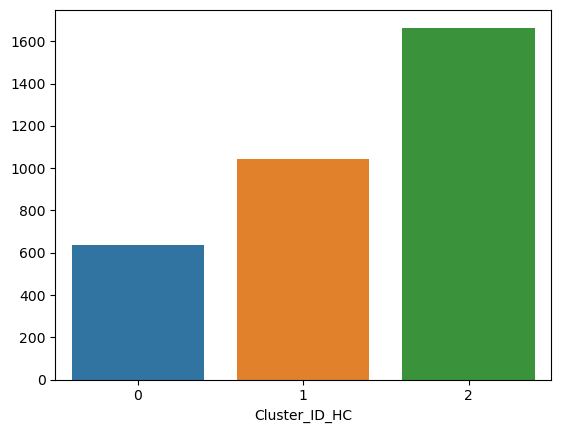

In [19]:
d=data.groupby('Cluster_ID_HC')['Cluster_ID_HC'].count()
sns.barplot(x=d.index,y=d.values)

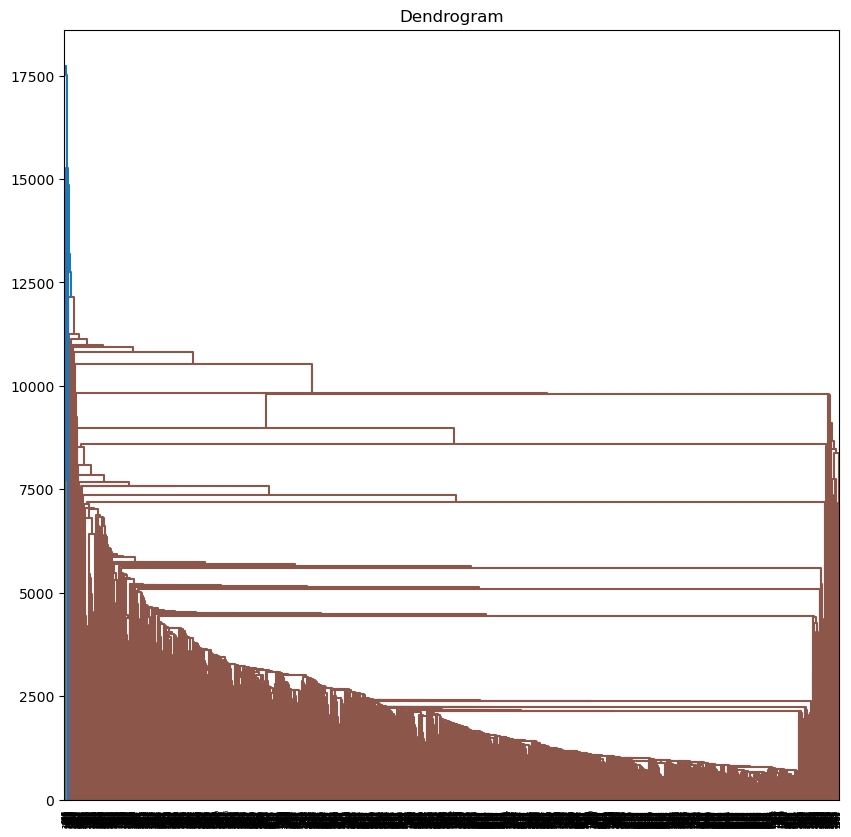

In [20]:
plt.figure(figsize=(10,10))
ddg=dendrogram(linkage(data),labels=data.index)
plt.title('Dendrogram')
plt.show()

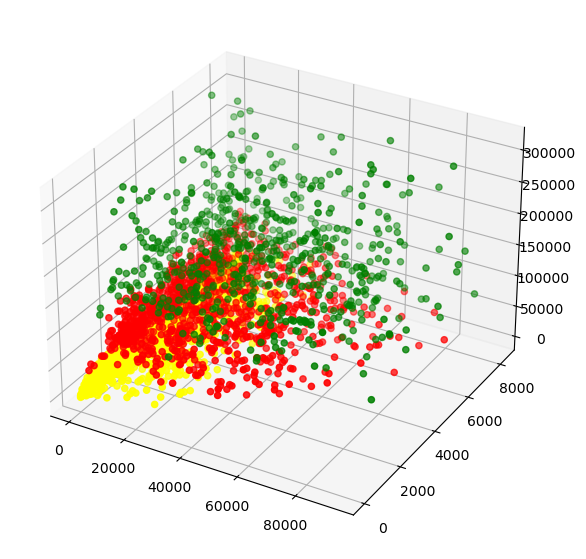

In [21]:
C0=data[data['Cluster_ID_HC']==0]
C1=data[data['Cluster_ID_HC']==1]
C2=data[data['Cluster_ID_HC']==2]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(C0['Bonus_miles'],C0['Days_since_enroll'],C0['Balance'],color = "green")
ax.scatter3D(C1['Bonus_miles'],C1['Days_since_enroll'],C1['Balance'],color = "red")
ax.scatter3D(C2['Bonus_miles'],C2['Days_since_enroll'],C2['Balance'],color = "yellow")

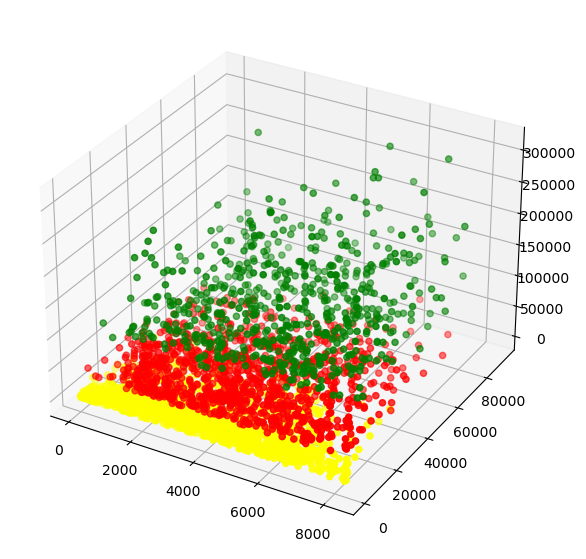

In [22]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(C0['Days_since_enroll'],C0['Bonus_miles'],C0['Balance'],color = "green")
ax.scatter3D(C1['Days_since_enroll'],C1['Bonus_miles'],C1['Balance'],color = "red")
ax.scatter3D(C2['Days_since_enroll'],C2['Bonus_miles'],C2['Balance'],color = "yellow")

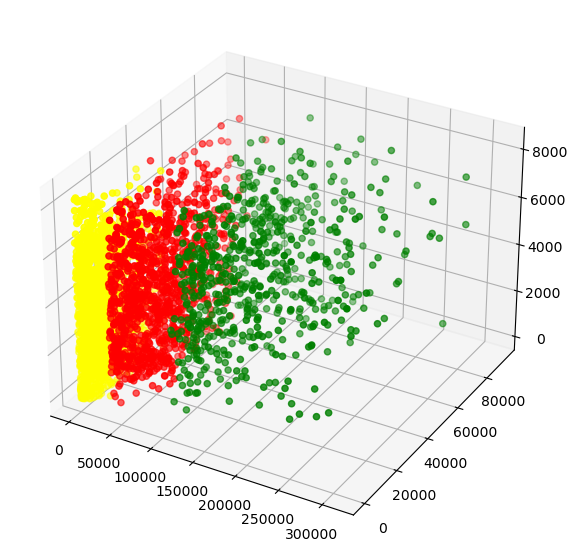

In [23]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")


ax.scatter3D(C0['Balance'],C0['Bonus_miles'],C0['Days_since_enroll'],color = "green")
ax.scatter3D(C1['Balance'],C1['Bonus_miles'],C1['Days_since_enroll'],color = "red")
ax.scatter3D(C2['Balance'],C2['Bonus_miles'],C2['Days_since_enroll'],color = "yellow")

## 💠DBSCAN

In [24]:
Model_DBSCAN=DBSCAN(eps=5000, min_samples=12)
Model_DBSCAN.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
data['Cluster_ID_DBSCAN']=Model_DBSCAN.labels_
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID_Kmeans,Cluster_ID_HC,Cluster_ID_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,2,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3,2,0


<Axes: xlabel='Cluster_ID_DBSCAN'>

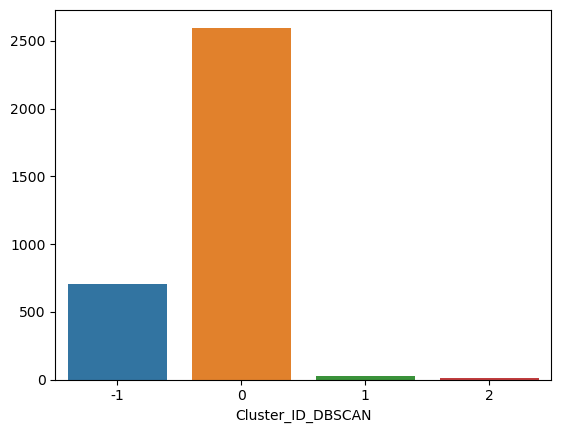

In [26]:
d=data.groupby('Cluster_ID_DBSCAN')['Cluster_ID_DBSCAN'].count()
sns.barplot(x=d.index,y=d.values)

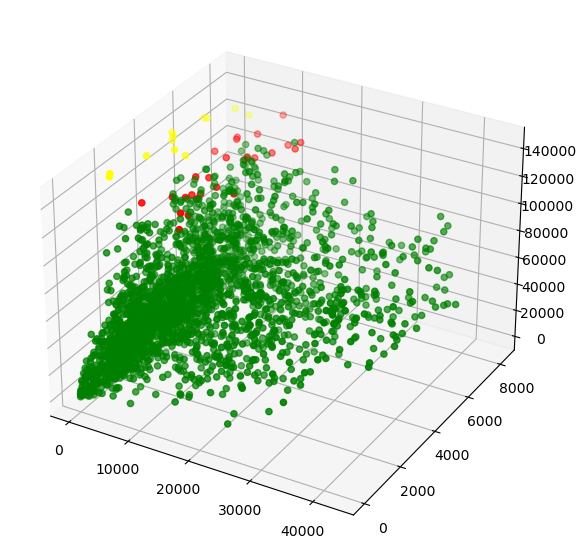

In [27]:
C0=data[data['Cluster_ID_DBSCAN']==0]
C1=data[data['Cluster_ID_DBSCAN']==1]
C2=data[data['Cluster_ID_DBSCAN']==2]
C3=data[data['Cluster_ID_DBSCAN']==3]
Cx=data[data['Cluster_ID_DBSCAN']==-1]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(C0['Bonus_miles'],C0['Days_since_enroll'],C0['Balance'],color = "green")
ax.scatter3D(C1['Bonus_miles'],C1['Days_since_enroll'],C1['Balance'],color = "red")
ax.scatter3D(C2['Bonus_miles'],C2['Days_since_enroll'],C2['Balance'],color = "yellow")
ax.scatter3D(C3['Bonus_miles'],C3['Days_since_enroll'],C3['Balance'],color = "blue")
#ax.scatter3D(Cx['Bonus_miles'],Cx['Days_since_enroll'],Cx['Balance'],color = "black")

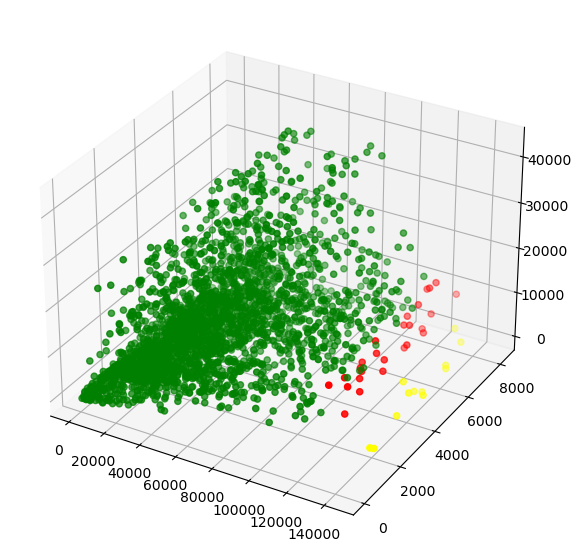

In [28]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(C0['Balance'],C0['Days_since_enroll'],C0['Bonus_miles'],color = "green")
ax.scatter3D(C1['Balance'],C1['Days_since_enroll'],C1['Bonus_miles'],color = "red")
ax.scatter3D(C2['Balance'],C2['Days_since_enroll'],C2['Bonus_miles'],color = "yellow")
ax.scatter3D(C3['Balance'],C3['Days_since_enroll'],C3['Bonus_miles'],color = "blue")
#ax.scatter3D(Cx['Balance'],Cx['Days_since_enroll'],Cx['Bonus_miles'],color = "black")

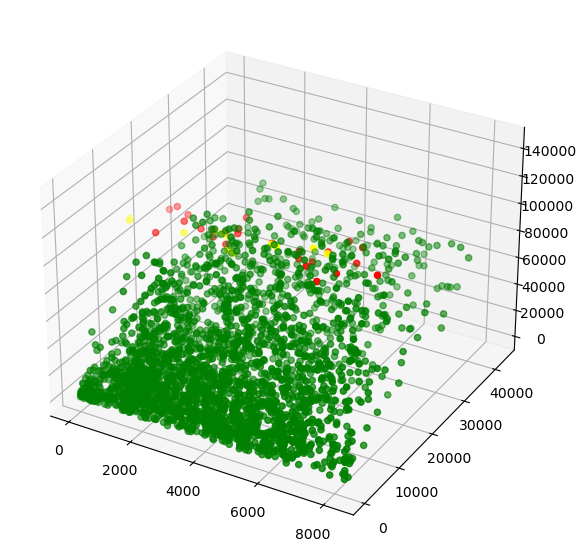

In [29]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(C0['Days_since_enroll'],C0['Bonus_miles'],C0['Balance'],color = "green")
ax.scatter3D(C1['Days_since_enroll'],C1['Bonus_miles'],C1['Balance'],color = "red")
ax.scatter3D(C2['Days_since_enroll'],C2['Bonus_miles'],C2['Balance'],color = "yellow")
ax.scatter3D(C3['Days_since_enroll'],C3['Bonus_miles'],C3['Balance'],color = "blue")

## 💠Model Evaluation

In [30]:
print('silhouette_score for Kmeans                  ', silhouette_score(df,data['Cluster_ID_Kmeans']))
print('silhouette_score for AgglomerativeClustering ', silhouette_score(df,data['Cluster_ID_HC']))
print('silhouette_score for DBSCAN                  ', silhouette_score(df,data['Cluster_ID_DBSCAN']))

silhouette_score for Kmeans                   -0.027481692689937966
silhouette_score for AgglomerativeClustering  0.45509333208210795
silhouette_score for DBSCAN                   0.34844224149781655


▣ KMeans : As we can observe from the silhouette_score after trying many combination of parameters, KMeans clusters seems to overlap and are unable to cluster the customers.

▣ AgglomerativeClustering: By observing the clusters formed from graphs and silhouette_score the structures formed are well defined.

▣ DBSCAN : The structure distribution of DBSCAN algorithm shows majority of customers are placed in single cluster, which represents improper clustering approach.

### 💠Conclusion: AgglomerativeClustering is the best suited for the datasets.

## 💠Cluster Interpretation : AgglomerativeClustering

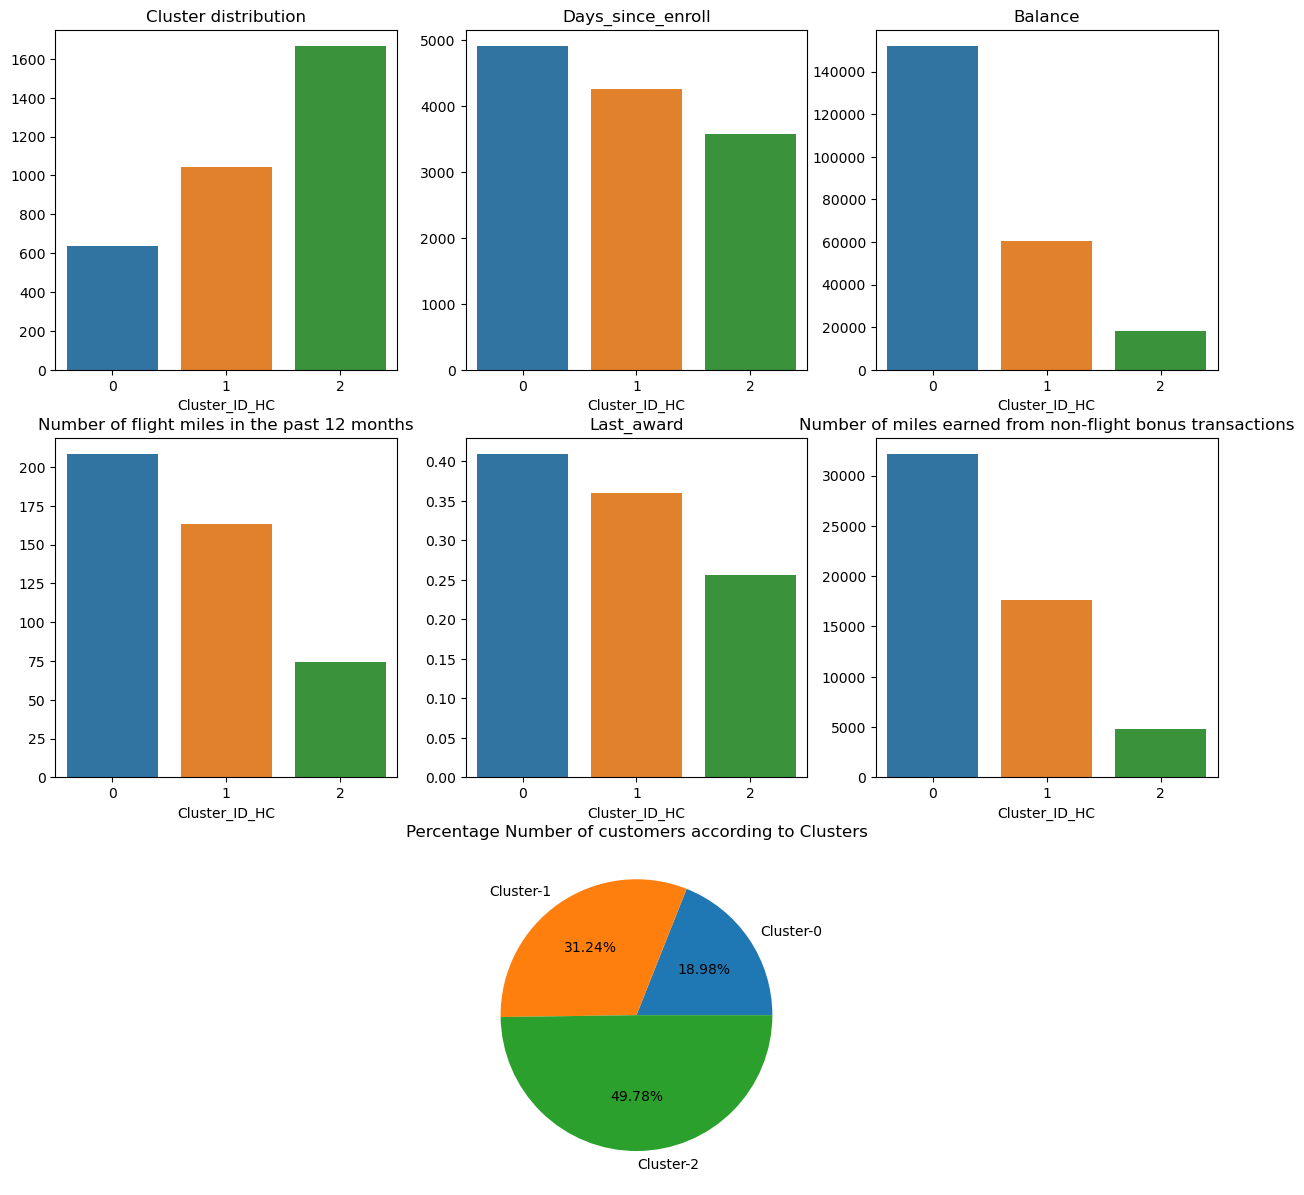

In [33]:
plt.figure(figsize=(15,15))

d=data.groupby('Cluster_ID_HC')['Cluster_ID_HC'].count()
plt.subplot(3,3,1)
sns.barplot(x=d.index,y=d.values)
plt.title('Cluster distribution')

d=data.groupby('Cluster_ID_HC')['Days_since_enroll'].mean()
plt.subplot(3,3,2)
sns.barplot(x=d.index,y=d.values)
plt.title('Days_since_enroll')

d=data.groupby('Cluster_ID_HC')['Balance'].mean()
plt.subplot(3,3,3)
sns.barplot(x=d.index,y=d.values)
plt.title('Balance')

d=data.groupby('Cluster_ID_HC')['Flight_miles_12mo'].mean()
plt.subplot(3,3,4)
sns.barplot(x=d.index,y=d.values)
plt.title('Number of flight miles in the past 12 months')

d=data.groupby('Cluster_ID_HC')['Award?'].mean()
plt.subplot(3,3,5)
sns.barplot(x=d.index,y=d.values)
plt.title('Last_award')

d=data.groupby('Cluster_ID_HC')['Bonus_miles'].mean()
plt.subplot(3,3,6)
sns.barplot(x=d.index,y=d.values)
plt.title('Number of miles earned from non-flight bonus transactions')

plt.subplot(3,3,8)
plt.pie(data.groupby('Cluster_ID_HC')['Cluster_ID_HC'].count(),autopct='%.2f%%',labels=['Cluster-0','Cluster-1','Cluster-2'])
plt.title('Percentage Number of customers according to Clusters')

plt.show()

—▶ Cluster- 0 : Customers belongs to this cluster are oldest, loyal and most frequent fliers.

—▶ Cluster- 1 : Customers belongs to this cluster are moderately old , loyal and reasonably frequent fliers.

—▶ Cluster- 2 : Customers belongs to this cluster are the new customers and are seldom fliers.
